3


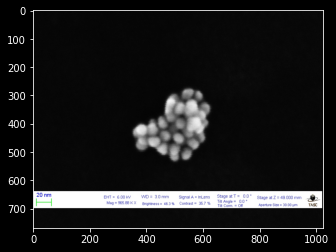

In [1]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

files = glob.glob(os.path.join(os.getcwd(), 'SemImages/*'))

# Creating an empty list to store the images

images = []

for file in files:
    img = cv2.imread(file)
    images.append(img)

# Plotting a random image from the list
x = np.random.randint(0, len(images))
plt.imshow(images[x])
print(x)

test = images[x]

# Reading the 'dug.jpeg' image

dug = cv2.imread('dug.jpeg')

Text(0.5, 1.0, 'Reversed')

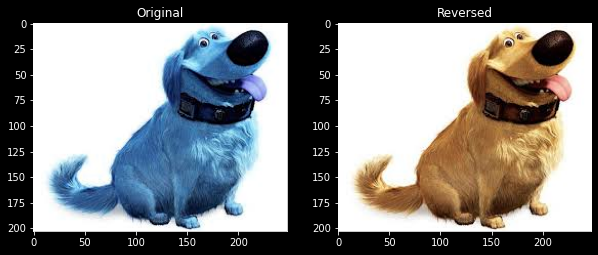

In [3]:
rev_dug = cv2.cvtColor(dug, cv2.COLOR_BGR2RGB)

# Plotting both objects dug and dug_rev

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(dug)
ax[0].set_title('Original')
ax[1].imshow(rev_dug)
ax[1].set_title('Reversed')

# Here we can se that the image is reversed when read using cv2.imread()

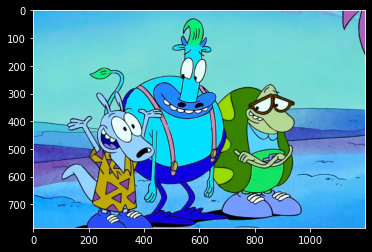

In [4]:
# Reading the 'rocko.jpg' image and plotting it

rocko = cv2.imread('rocko.jpg')
plt.imshow(rocko)

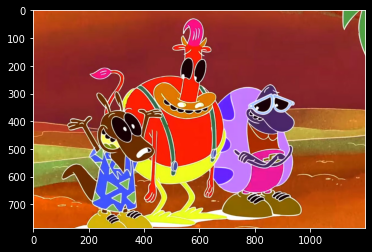

In [5]:
# Converting the image to its negative

rocko_neg = 255 - rocko

# Plotting the negative image

plt.imshow(rocko_neg)


Text(0.5, 1.0, 'Negative')

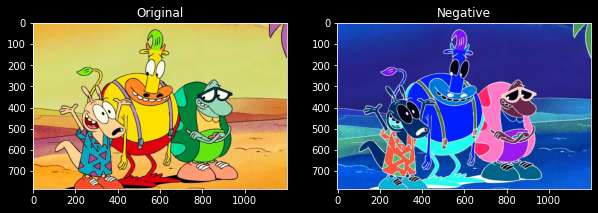

In [6]:
# Converting the image with cv2.COLOR_BGR2RGB
# and plotting the original and negative images

rocko_rev = cv2.cvtColor(rocko, cv2.COLOR_BGR2RGB)
rocko_neg_rev = 255 - rocko_rev

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rocko_rev)
ax[0].set_title('Original')
ax[1].imshow(rocko_neg_rev)
ax[1].set_title('Negative')



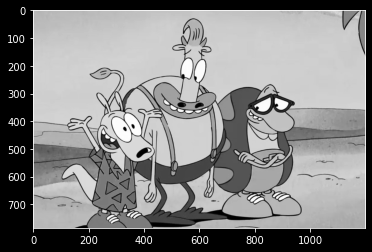

In [7]:
# Converting the image to grayscale

rocko_gray = cv2.cvtColor(rocko, cv2.COLOR_BGR2GRAY)

# Plotting the grayscale image

plt.imshow(rocko_gray, cmap='gray')

Text(0.5, 1.0, 'Blue')

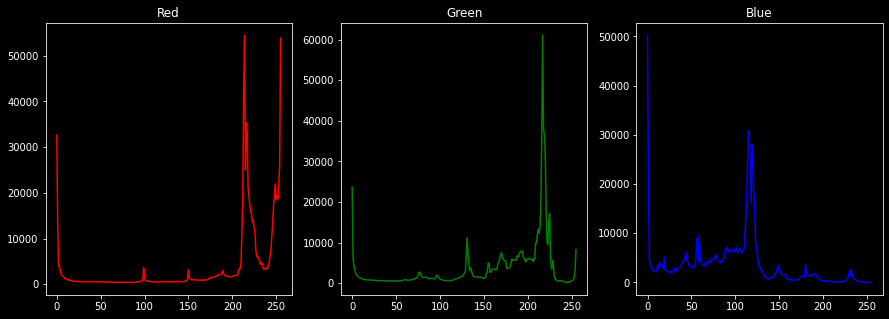

In [10]:
# Probably we will need an histogram of how much information
# is in each color channel, we will use the cv2.calcHist() function

# This histogram shows the distribution of the colors in the image

histred = cv2.calcHist([rocko], [2], None , [256], [0, 256])
histgreen = cv2.calcHist([rocko], [1], None, [256], [0, 256])
histblue = cv2.calcHist([rocko], [0], None, [256], [0, 256])

# Plotting the histograms

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(histred, color='red')
ax[0].set_title('Red')
ax[1].plot(histgreen, color='green')
ax[1].set_title('Green')
ax[2].plot(histblue, color='blue')
ax[2].set_title('Blue')

(768, 1024, 3)

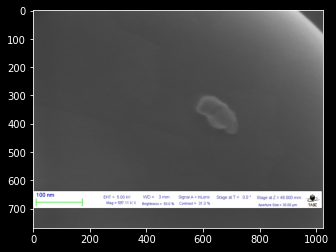

In [12]:
import cv2
import os
import glob

files = glob.glob(os.path.join(os.getcwd(), 'SemImages/*'))

# Reading the first image

img = cv2.imread(files[0])

# Displaying the image with matplotlib

import matplotlib.pyplot as plt

plt.imshow(img)

In [13]:
# Now we apply several masks with cv2 to the image to get an idea
# of how can we create a mask to get the particles

# We create a variable to see how the mask affects the image

images = []

for a in range(0, 256, 20):
    mask = cv2.inRange(img, (a,a,a), (255,255,255))
    images.append(mask)

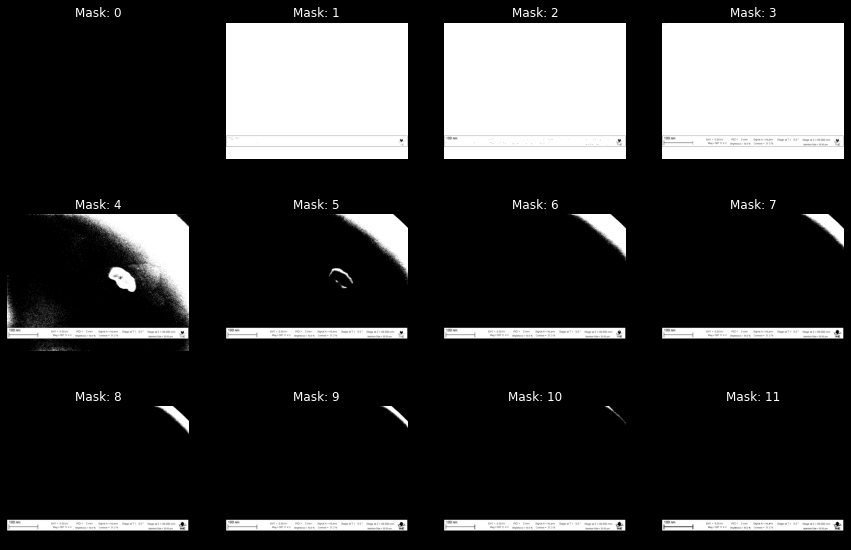

In [14]:
# Showing the first 12 images

fig, ax = plt.subplots(3, 4, figsize=(15, 10))
for i in range(3):
    for j in range(4):
        ax[i, j].imshow(images[i*4+j], cmap='gray')
        ax[i, j].set_title('Mask: '+str(i*4+j))
        ax[i, j].axis('off')


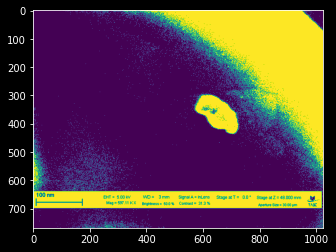

In [15]:
# Accessing the first image

im1 =  images[4]

# Visualizing the image

plt.imshow(im1)